<a href="https://colab.research.google.com/github/shubham2721/ML_PROJECTS/blob/main/Telecom_Data_Analysis_and_Churn_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Telecom Company Data Analysis And Prediction**

<b> Problem Statement: </b>
* In telecom domain where the customer acquisition has higher cost than customer retention and where there is a rampant price war, it becomes 
important to predict and profile the customer behavior and predict them so that offers can be rolled out to retain them prior to switching.
* Data consist of the various behavior of customers and the last column states if the customer is still with the existing telecom company or not.

## Exploratory Data Analysis

Installing the library opendatasets which helps to download data from Google Drive

In [ ]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# importing essential libraries
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
od.download('https://drive.google.com/file/d/1AdXaRLf1VYE-lroqlLTt98qT2j3qCZ3Y/view?usp=sharing')

312393it [00:00, 195884468.45it/s]

Downloaded to  ./data.csv


In [ ]:
df = pd.read_csv('/content/data.csv')

In [ ]:
#checking data types and null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      3333 non-null   object 
 1   State                   3333 non-null   object 
 2   Account length          3333 non-null   int64  
 3   Area code               3333 non-null   int64  
 4   International plan      3333 non-null   object 
 5   Voice mail plan         3333 non-null   object 
 6   Number vmail messages   3333 non-null   int64  
 7   Total day minutes       3333 non-null   float64
 8   Total day calls         3333 non-null   int64  
 9   Total day charge        3333 non-null   float64
 10  Total eve minutes       3333 non-null   float64
 11  Total eve calls         3333 non-null   int64  
 12  Total eve charge        3333 non-null   float64
 13  Total night minutes     3333 non-null   float64
 14  Total night calls       3333 non-null   

In [ ]:
# viewing the sample of data from dataframes
df.sample(5)

,Id,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
377,CUST-378,ND,79,408,No,No,0,205.7,123,34.97,...,108,18.23,226.1,106,10.17,6.7,18,1.81,1,False
2663,CUST-2664,VA,172,510,No,No,0,169.8,123,28.87,...,94,15.56,395.0,72,17.77,12.7,7,3.43,2,False
2716,CUST-2717,WV,137,510,No,Yes,50,186.5,94,31.71,...,106,15.13,215.6,100,9.70,12.1,4,3.27,2,False
574,CUST-575,WV,44,510,No,No,0,228.1,121,38.78,...,79,23.50,279.8,77,12.59,9.9,5,2.67,2,True
164,CUST-165,OK,146,415,No,No,0,206.3,151,35.07,...,89,12.63,167.2,91,7.52,6.1,3,1.65,1,False


In [ ]:
# different features
df.columns

Index(['Id', 'State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

* Here Churn is the Target variable and rest of them are features

In [ ]:
df.dtypes

Id                         object
State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
# Converting the required data types
df["Churn"] = df["Churn"].astype(int)
df['Area code'] = df['Area code'].astype('object')

### **1. Churn Ratio in Dataset**

In [ ]:
df['Churn'].value_counts()/df.shape[0] * 100

0    85.508551
1    14.491449
Name: Churn, dtype: float64

In [ ]:
px.pie(values = (df['Churn'].value_counts()/df.shape[0] * 100), names = ['Not Churned', 'Churned'])

Conclusion:
* The Unchurned customers are greater than churned customers, this shows that the data is quite imbalanced 

### **2. Univariate**

* The objective of univariate analysis is to derive the data, define and summarize it, and analyze the pattern present in it. In a dataset, it explores each variable separately. It is possible for two kinds of variables- Categorical and Numerical.

**1. Categorial Variable**

In [ ]:
# finding Categorial Variables in datasets
for i in df.columns:
  if df[i].dtypes != np.float64 and df[i].dtypes != np.int64:
    print(i)

Id
State
Area code
International plan
Voice mail plan


**State**

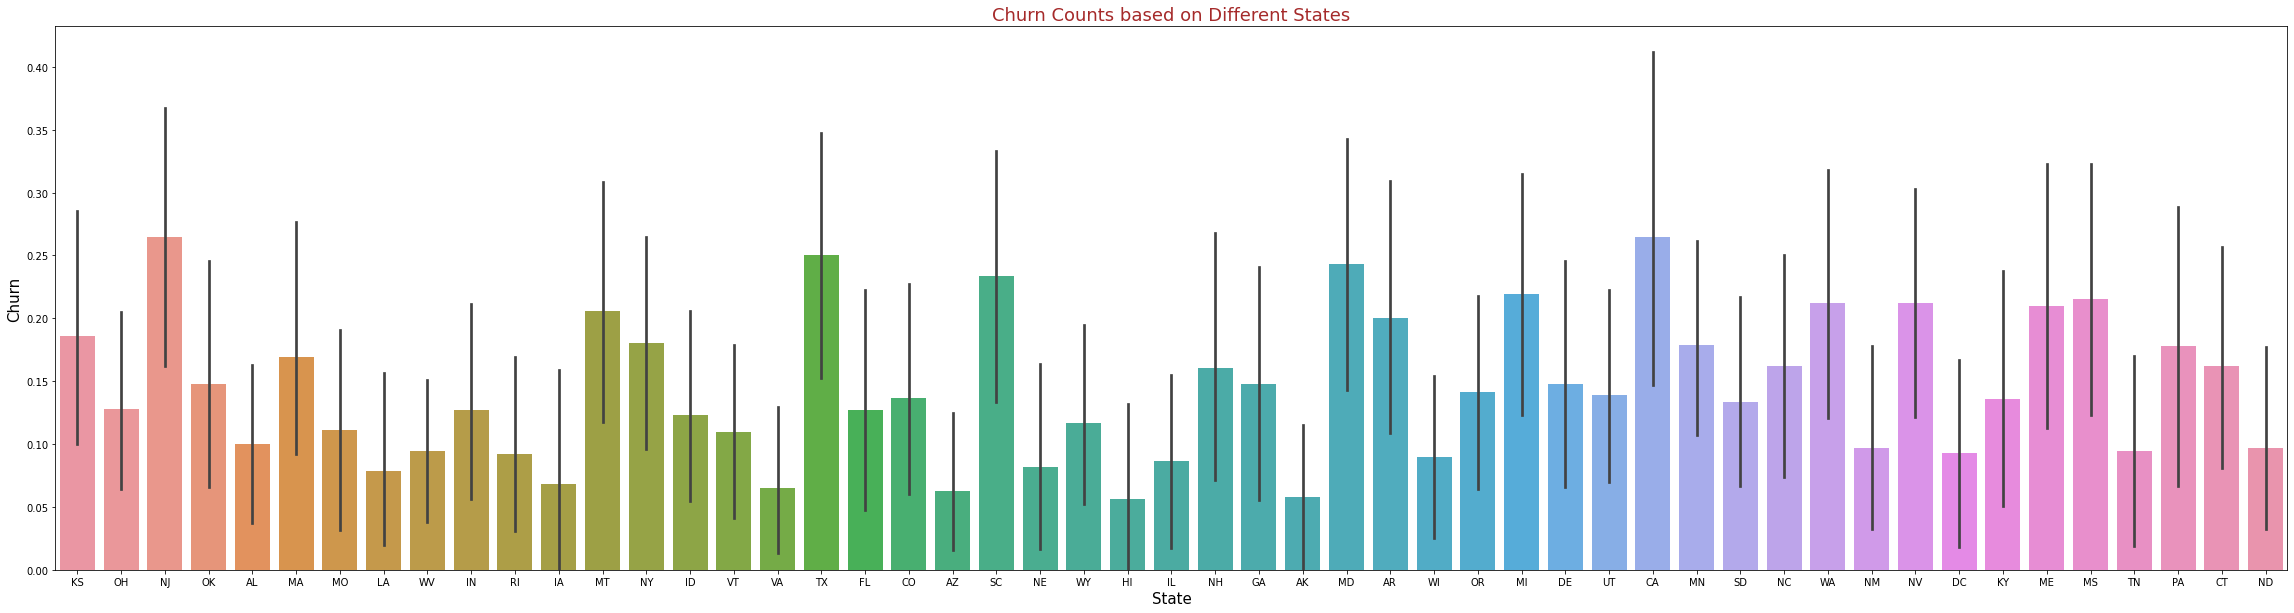

In [ ]:
plt.figure(figsize = (40,10))
plt.title("Churn Counts based on Different States", color = 'Brown', size = 18)
plt.xlabel('State', size = 15)
plt.ylabel('Churn', size = 15)
sns.barplot(x = df['State'], y=df["Churn"]);

In [ ]:
state_wise = df.groupby('State')['Churn'].sum()
px.choropleth(locations=state_wise.index, locationmode="USA-states", color=state_wise.values, scope="usa",
              title = 'State Wise Churn Rate')

**Conclusion**
* In the New Jersey, California and Texas the churn rate is quite higher than the rest of the states

**Area Code**

In [ ]:
cgrl_vrbl = ['Area code','International plan','Voice mail plan']

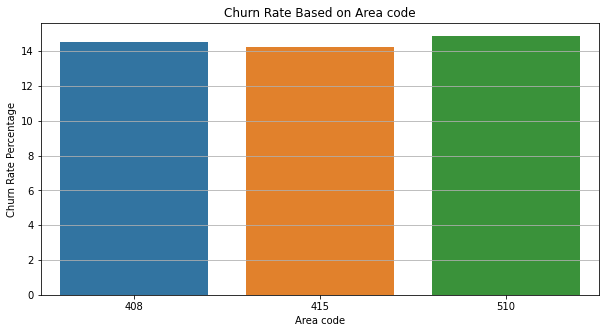

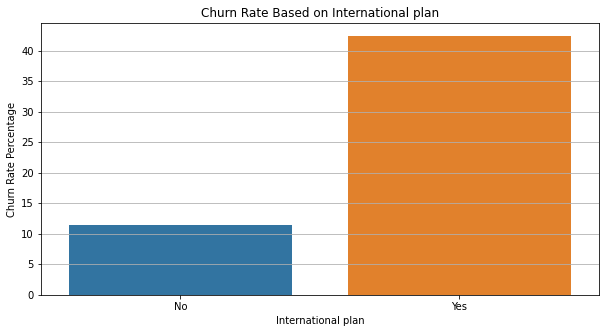

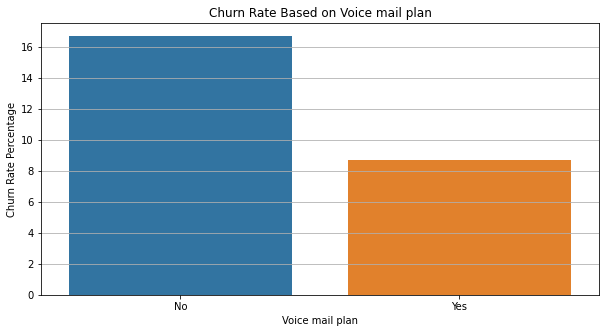

In [ ]:
for i in cgrl_vrbl:
  plt.figure(figsize = (10,5))
  plt.grid()
  plt.title(f'Churn Rate Based on {i}')
  plt.xlabel(f'{i}')
  plt.ylabel('Churn Rate Percentage')
  sns.barplot(x=(df.groupby(i)['Churn'].mean() * 100).index,
  y = (df.groupby(i)['Churn'].mean() * 100).values);
  plt.show()

**Conclusion**:
* In the first graph we can observe that the churn rate is similar in all the areas so we cannot clarify much regarding churn.
* From the second and third the possibility of churning is high when customers have international plan and do not have voice mail plan.

<b>2. Continuous Variables

In [ ]:
# 5 Summary Statistics
df.describe()

,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


From the above we can say that
* Night Charges are lesser than evening charges and day charges which is the highest among them.


Striving the correlation of the target value with the continuous variables

In [ ]:
# Coefficient of correlation with Target variable that is Churn
df.corr()['Churn'].sort_values()[0:-1]

Number vmail messages    -0.089728
Total intl calls         -0.052844
Total night calls         0.006141
Total eve calls           0.009233
Account length            0.016541
Total day calls           0.018459
Total night minutes       0.035493
Total night charge        0.035496
Total intl minutes        0.068239
Total intl charge         0.068259
Total eve charge          0.092786
Total eve minutes         0.092796
Total day charge          0.205151
Total day minutes         0.205151
Customer service calls    0.208750
Name: Churn, dtype: float64

In [ ]:
# Plotting graph to view the insight
graph = px.bar(x = df.corr()['Churn'].sort_values()[0:-1].index,
      y = df.corr()['Churn'].sort_values()[0:-1].values,
       template = 'plotly_dark',
       color = df.corr()['Churn'].sort_values()[0:-1].values,
       width = 1300,
       height = 350)
graph.update_layout(xaxis_title = 'Features',
                    yaxis_title = 'Correlation with Churn',
                    coloraxis_showscale = False)

**Conclusion**
1. Columns such as Customer service calls, Total day minutes and Total day charge have moderate positive correlation.

Analysing seperately all the continuous values

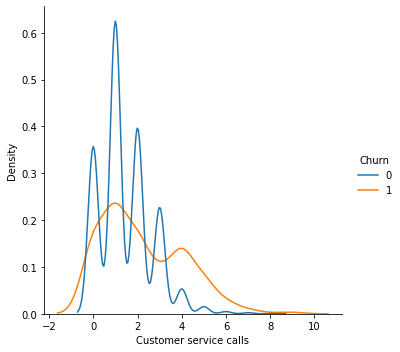

In [ ]:
# Customer service calls
sns.displot(x = df['Customer service calls'], kind = 'kde', hue = df['Churn'],
            common_norm = False);

**Conclusion**
* We can observe that between 1 and 2 Customer service calls churning is quite low.
* But If the calls are greater than 4 then the chances of churning is high.

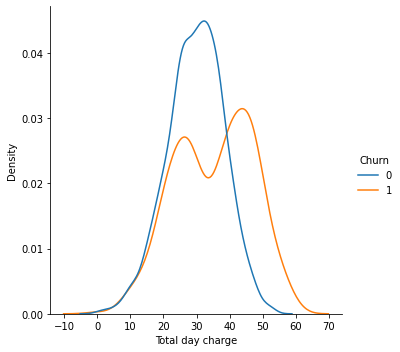

In [ ]:
# Total day charge
sns.displot(x = df['Total day charge'], kind = 'kde', hue = df['Churn'],
            common_norm = False);

**Conclusion**
* We can observe that between 20 and 40 day calls charges churning of customers is low.
* If the charges increases from 45 then the chances of churning is quite high.

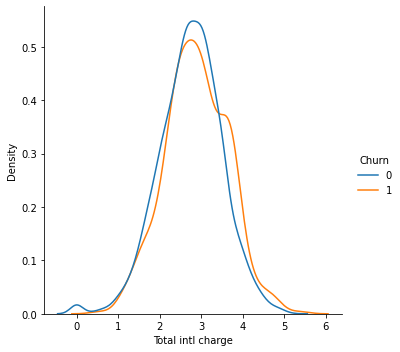

In [ ]:
# Total International charge
sns.displot(x = df['Total intl charge'], kind = 'kde', hue = df['Churn'],
            common_norm = False);

**Conclusion**
* We can observe from the above that both churned and unchurned are quite similar but if the international charges is between 4 to 5 then churn rate is greater.

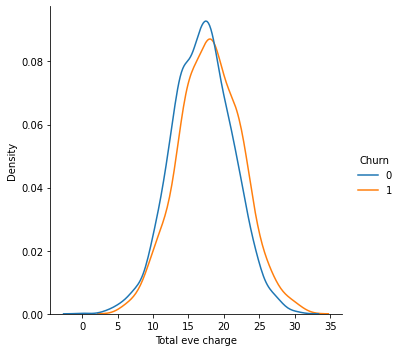

In [ ]:
# Total eve charge
sns.displot(x = df['Total eve charge'], kind = 'kde', hue = df['Churn'],
            common_norm = False);

**Conclusion**
* We can observe from the above that both churned and unchurned are similar but if the evening charges increases from 20 then churning possibility is increased.

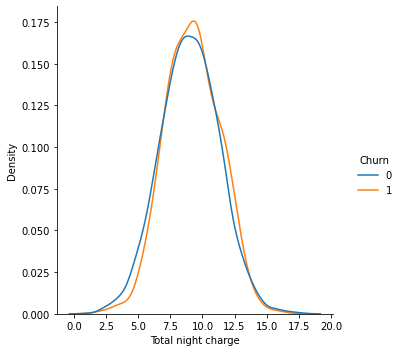

In [ ]:
# Total Night charge
sns.displot(x = df['Total night charge'], kind = 'kde', hue = df['Churn'],
            common_norm = False);

**Conclusion**
* We can observe from the above when the total night charge is from 8 to 10 then churning of customer is high.

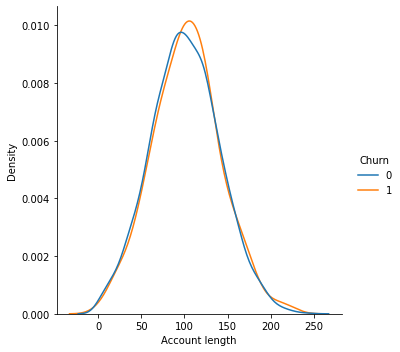

In [ ]:
# Account length
sns.displot(x = df['Account length'], kind = 'kde', hue = df['Churn'],
            common_norm = False);

**Conclusion**
* Customers with the shot account length and large account lenth has no impact over churning but when its between 100 - 150 chances of churning is possible.

**Note:** 
* From all the above continuous features 'Customer service calls' and 'Total day charges' have more predict powers compare to others. 
* We have not taken some features as their correlation is closer to 0 or some of them resembles the same characteristics like (Total day charge = Total day minutes)

### **3. Bivariate Analysis**

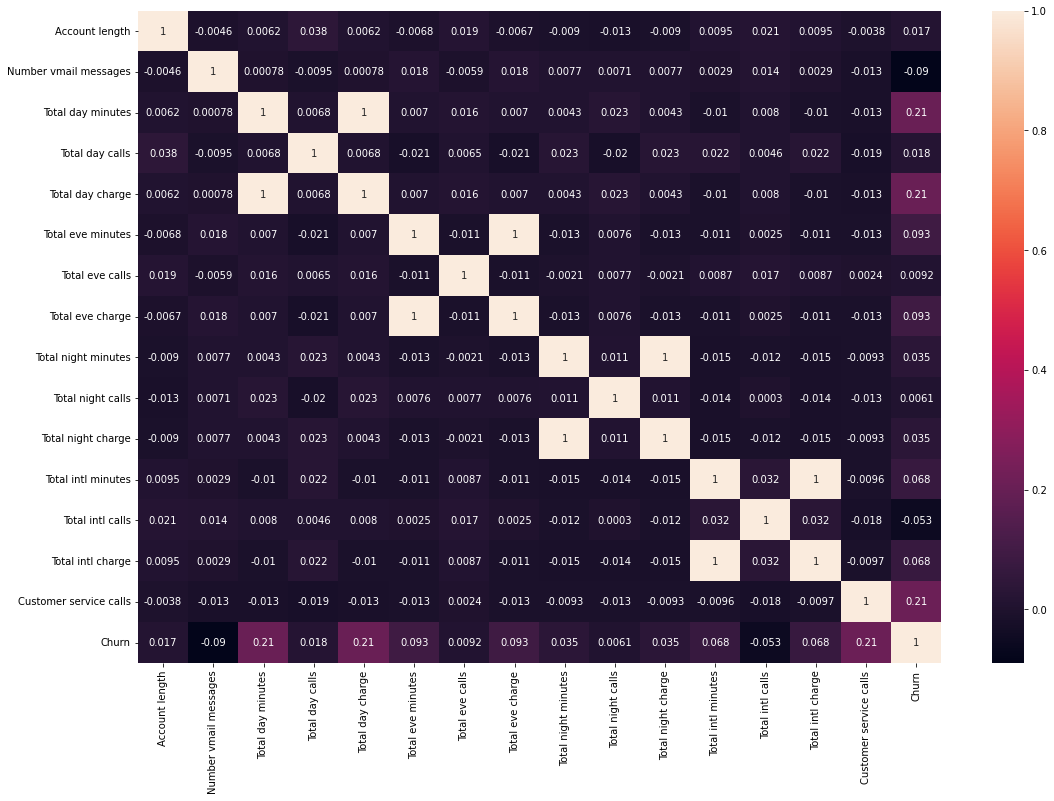

In [ ]:
plt.figure(figsize = (18,12))
sns.heatmap(df.corr(), annot =True);

**Conclusion**
* We can see diagonally the value is 1 as it is the self correlation, but some of them also have their value equal to one because they poses the same characteristics for example: Total day charges is totaly depends upon Total day minutes as the minutes increases the charges will increase simultaneously(for this we can either drop one of the column as it is a kind of redundancy when building a model)

We will pick some important columns which has some significance to churn rate and draw pair plot among them

In [ ]:
high_correlation_features = ['Total day minutes','Total night charge','Total eve charge','Total intl calls', 'Customer service calls', 'Number vmail messages', 'Churn']

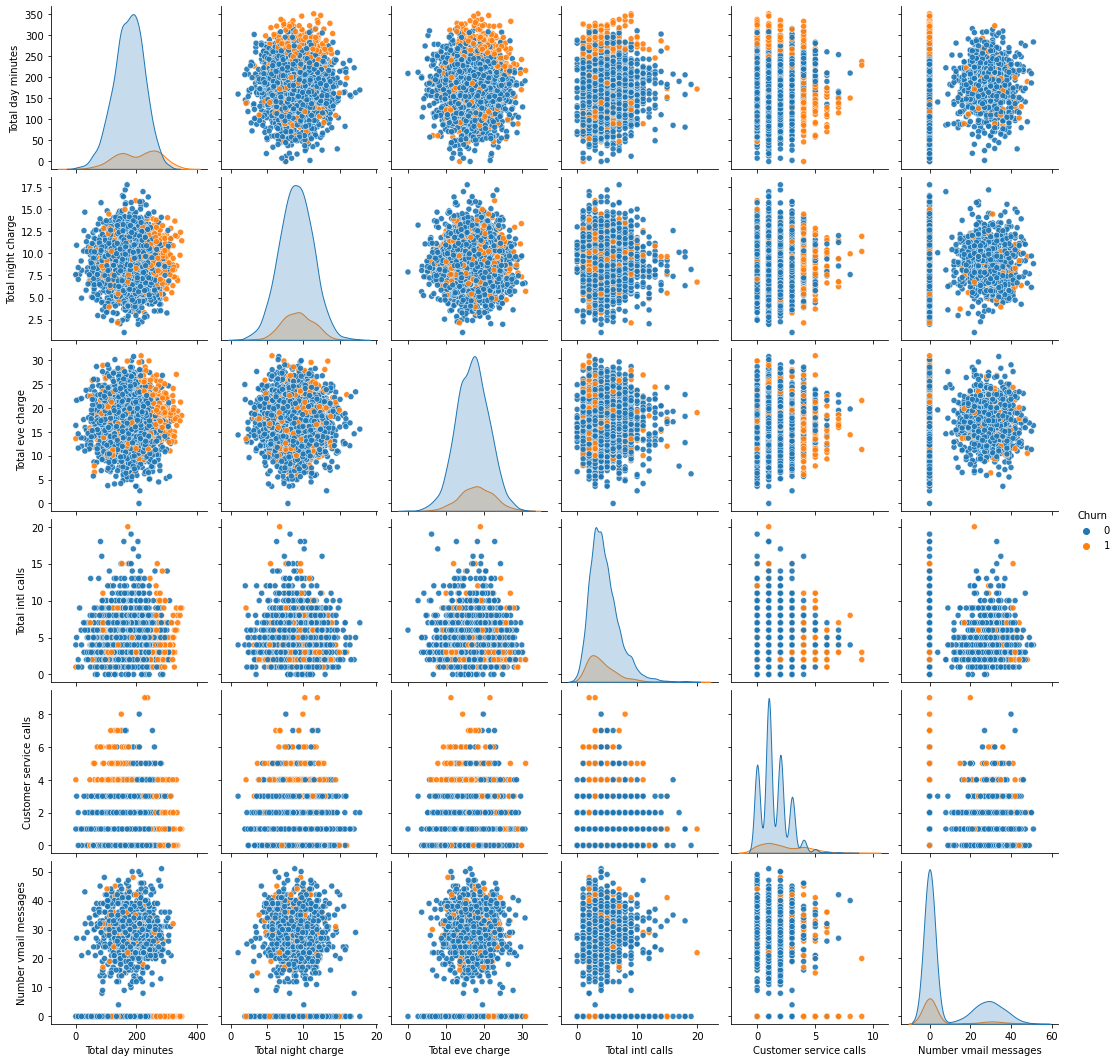

In [ ]:
sns.pairplot(df[high_correlation_features], hue = 'Churn', plot_kws={'alpha':0.9});

**Conclusion**
* ***Customer Service Calls and Total day minutes*** - Observing the pairplots we can say that when service calls are greater than 4 and total day minutes are less than 200 then there are high chances of churning.
* ***Number vmail messages and Customer service calls*** - Observing the pairplots we can say that when vmail messages is 0 and customer service calls is greater than 4 then high chances of churning.
* ***Number vmail messages and Total day minutes*** - observing the pairplots when number of voice messages is equal to 0 and total day minutes greater than 200 then chances are high of churning.

Imp Insights: We can say that most of the churning are happening when Customer Service Calls is greater than 4.

## **Customer Churn Prediction**

In [ ]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 5.6 MB/s 


Importing important libraries for creating best model

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn import svm 
from sklearn.metrics import f1_score
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# we will create a copy of dataframe
df_dummies = df.copy()

In [ ]:
df_dummies.head()

,Id,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,...,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,CUST-1,KS,128,415,No,Yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,CUST-2,OH,107,415,No,Yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,CUST-3,NJ,137,415,No,No,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,CUST-4,OH,84,408,Yes,No,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,CUST-5,OK,75,415,Yes,No,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


###**1. Dealing with Missing Values**

In [ ]:
df_dummies.isna().sum().any()

False

There is no missing values in the dataset

###**2. Splitting the dataset**

* We will split the data into Training and Testing sets.

In [ ]:
# Now Splitting the data in form of X = features and y = target
X = df_dummies.drop(columns = ['Churn']) # Feature Columns
y = df_dummies['Churn'] # Target Column

In [ ]:
# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

<b>Comparing ratio of churn in all the splits </b> (this is to check weather the split is balanced or not)

In [ ]:
churn_ratio = {'y_train' : (y_train.mean() * 100).round(2),
             'y_test' : (y_test.mean() * 100).round(2)}
churn_ratio = pd.DataFrame(churn_ratio, index = ['churn ratio']).T

In [ ]:
churn_ratio

,churn ratio
y_train,14.48
y_test,14.54


In [ ]:
graph = px.bar(x = churn_ratio.index, y = churn_ratio['churn ratio'] ,color = churn_ratio['churn ratio'],
       width = 600,
       height = 250,
    template = 'plotly_dark'
  )
graph.update_layout(xaxis_title = 'Data Splits',
                    yaxis_title = 'Churn Percentage',
                    coloraxis_showscale = False)
graph.show()

Hence from above we can see that in all the splits have balanced churn percentage

###**3. Categorial Variable Encoding**
1. State - There are 51 unique states so we cannot use One Hot Encoder as it will create 51 more columns, so for this column we will use Target Endoder
2. Area Code - Three Unique area codes so can use One hot encoder
3. International plan - (Boolean) One Hot Encoder
4. Voice mail plan - (Boolean) One hot Encoder

###<b>4. Feature Selection </b> <br>
Feature selection is a way of reducing the input variable for the model by using only relevant data in order to reduce overfitting in the model.

We can achieve above two processes with column transformer.

In [ ]:
# Reseting the index
X_train = X_train.reset_index(drop = True)
y_train = y_train.reset_index(drop = True)

In [ ]:
column_trans = make_column_transformer((TargetEncoder(), ['State']),
                                       (OneHotEncoder(), ['Area code']),
                                       (OneHotEncoder(drop = 'if_binary'), ['International plan', 'Voice mail plan']),
                                       ('drop' , ['Id', 'Total day minutes', 'Total eve minutes', 'Total night minutes', 'Total intl minutes']),
                                       (StandardScaler(), ['Account length', 'Number vmail messages',
                                        'Total day calls', 'Total day charge',
                                        'Total eve calls', 'Total eve charge',
                                        'Total night calls', 'Total night charge',
                                        'Total intl calls', 'Total intl charge', 'Customer service calls'])
                                       )

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:94: FutureWarning:

Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327

/usr/local/lib/python3.7/dist-packages/category_encoders/target_encoder.py:99: FutureWarning:

Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327



Note:
* Removed Id column as it has no relevance to target variables
* Total day minutes, Total eve minutes, Total night minutes are removed as it resembles the same correlation as Charges of the day, evening and night.

In [ ]:
# Now fir and transform the training and testing sets
X_train = column_trans.fit_transform(X_train, y_train)
X_test = column_trans.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

In [ ]:
# Renaming the columns
X_train.columns = ['State','Area_408', 'Area_415', 'Area_510','International plan',
       'Voice mail plan','Account length', 'Number vmail messages',
       'Total day calls', 'Total day charge',
       'Total eve calls', 'Total eve charge',
       'Total night calls', 'Total night charge',
       'Total intl calls', 'Total intl charge', 'Customer service calls']
X_test.columns = X_train.columns

###**6. Choosing the Right Model based on evaluation metrics**

In [ ]:
# We will use this sets of machine learning model and will evaluate the best models out of it
models = {"Decision Tree" : DecisionTreeClassifier(),
         "Logistic Regression" : LogisticRegression(),
          "K Nearest Neighbor" :  KNeighborsClassifier(),
          "Random Forest Classifier" : RandomForestClassifier()
          }

In [ ]:
# Now we will create a function for finding the best model with Accuracy Score
def fit_score(model, X_train, X_test, y_train, y_test):
    # set Random Seed
    np.random.seed(42)
    # this dicionary will add accuracy score to the models
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        model = model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        model_scores[name] = accuracy_score(y_test, y_preds)
    return model_scores

In [ ]:
accuracy_score = fit_score(model = models,
          X_train = X_train,
          X_test = X_test,
          y_train= y_train,
          y_test = y_test)

In [ ]:
model_compare = pd.DataFrame(accuracy_score, index = ['accuracy']).T.sort_values(by = 'accuracy', ascending = False)

In [ ]:
graph = px.bar(x = model_compare.index, y = model_compare['accuracy'], color =  model_compare['accuracy'], title = 'Comparing models with Accuracy Score',
       width = 800,
       height = 350,
       template = 'plotly_dark')
graph.update_layout(xaxis_title = 'Models',
                    yaxis_title = 'Accuracy Score',
                    coloraxis_showscale = False)
graph.show()

**Conclusion**
* The best model according to accuracy score is Random Forest Classifier as shown in graph.
* But we will choose the model with the lowest **False Negative Rate** since it doesn't affect much if we predict customers who aren't churning as churners. However, it will be problematic from a business standpoint if we anticipate customers who are churning as not churners.

###**7. Selecting Evaluation Metrics**
1. Precision - Predicted true positives (T.P / T.P + F.P)
2. Recall - Actual true positves (T.P / T.P + F.N)
3. F1 Score - Harmonic Progression of Precision and Recall

* Recall can be choosen because it is inversely proportional to False Negative Rate.
* But we will choose **Fbeta Score** which is combination of both precesion and recall and put some weight over recall by assigning the beta parameter > 1  (as recall is most important).

Drawing Confusion Matrix for all the models

In [ ]:
# Now we will draw confusion matrix for all the models
def fit_score(model, X_train, X_test, y_train, y_test):
    # set Random Seed
    np.random.seed(42)
    # this dicionary will add accuracy score to the models
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        model = model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        model_scores[name] = metrics.confusion_matrix(y_test, y_preds)
    return model_scores

In [ ]:
conf_mat = fit_score(model = models,
          X_train = X_train,
          X_test = X_test,
          y_train= y_train,
          y_test = y_test)

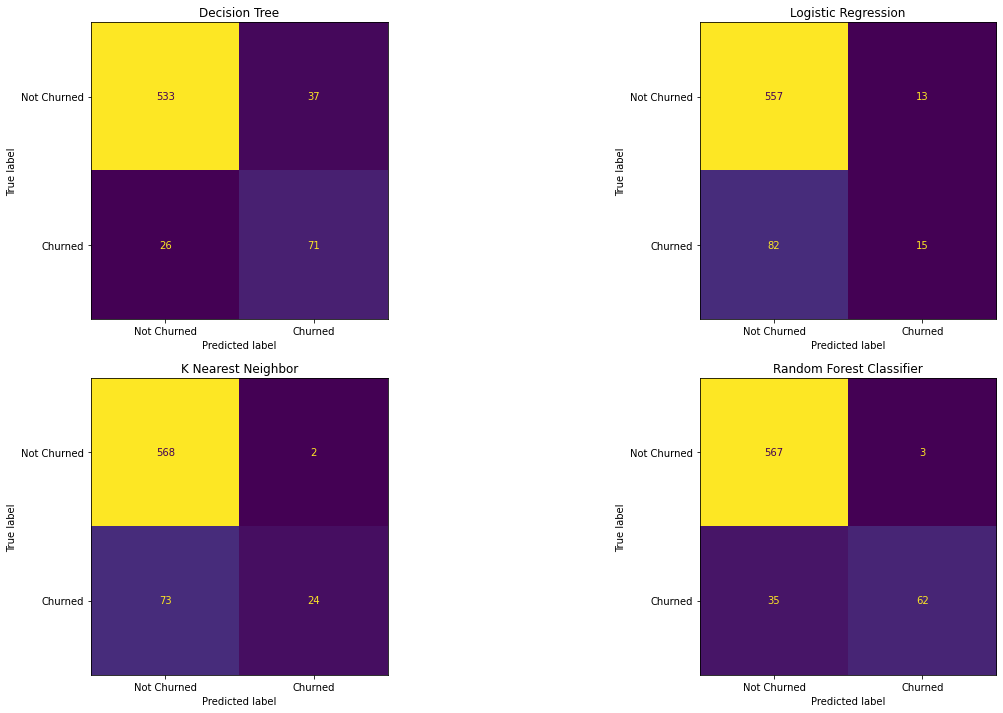

In [ ]:
conf_mat_list = conf_mat.keys()
fig, ax = plt.subplots(2,2, figsize=(20,12))
row = 0
col = 0
for j, i in enumerate(conf_mat_list):
    if j == 2:
      row = 1
      col = 0
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat[i], display_labels = ['Not Churned', 'Churned'])
    cm_display.plot(ax=ax[row,col], colorbar=False)
    ax[row,col].title.set_text(f'{i}')
    col+=1


* Decision Tree is having the lowest False Negative from confusion matrix

In [ ]:
# Now we will calculate the recall score for all the models
def fit_score(model, X_train, X_test, y_train, y_test):
    # set Random Seed
    np.random.seed(42)
    # this dicionary will add recall score to the models
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        model = model.fit(X_train, y_train)
        y_preds = model.predict(X_test)
        model_scores[name] = metrics.fbeta_score(y_test, y_preds, beta =2)
    return model_scores

In [ ]:
fbeta_scores = fit_score(model = models,
          X_train = X_train,
          X_test = X_test,
          y_train= y_train,
          y_test = y_test);

In [ ]:
fbeta_scores

{'Decision Tree': 0.7157258064516129,
 'Logistic Regression': 0.18028846153846154,
 'K Nearest Neighbor': 0.2898550724637681,
 'Random Forest Classifier': 0.684326710816777}

In [ ]:
model_compare = pd.DataFrame(fbeta_scores, index = ['fbeta_scores']).T.sort_values(by = 'fbeta_scores', ascending = False)

In [ ]:
graph = px.bar(x = model_compare.index, y = model_compare['fbeta_scores'], color =  model_compare['fbeta_scores'], title = 'Comparing models with Fbeta score',
       width = 800,
       height = 350,
       template = 'plotly_dark')
graph.update_layout(xaxis_title = 'Models',
                    yaxis_title = 'Fbeta Score',
                    coloraxis_showscale = False)
graph.show()

We can see that Decision Tree is on the top in fbeta score therefore we will pick decision tree for hypertuning

###**8. Decision Tree HyperTuning**
* By performing this step we will try to improve the perfromance of fbeta score


GridSearchCV for hyper tuning

from sklearn.model_selection import GridSearchCV


In [ ]:
dtree = DecisionTreeClassifier(random_state = 42)

In [ ]:
parameters = { 'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [ ]:
from sklearn.metrics import fbeta_score, make_scorer
ftwo_scorer = make_scorer(fbeta_score, beta=2)
ftwo_scorer

make_scorer(fbeta_score, beta=2)

In [ ]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(dtree, 
                    param_grid = parameters,
                    cv = 10,
                    n_jobs  = -1,
                    scoring = ftwo_scorer,
                    return_train_score = True)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             return_train_score=True, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
# Analysing the max mean_test_score and difference between the mean_train_score and mean_test_score is lowest
pd.DataFrame(grid.cv_results_).sort_values(by = 'mean_test_score', ascending = False)[['mean_train_score', 'mean_test_score']].head(10)

,mean_train_score,mean_test_score
46,0.786531,0.727714
20,0.834581,0.725629
41,0.785193,0.725312
15,0.820033,0.725132
16,0.776015,0.723328
21,0.776015,0.721940
37,0.746829,0.715436
36,0.753756,0.710013
42,0.739058,0.708506
40,0.841361,0.706309


* We will pick the parameters from the first row as mean_test_Score is maximum and difference is also less compared to others

In [ ]:
pd.DataFrame(grid.cv_results_).sort_values(by = 'mean_test_score', ascending = False).head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
46,0.035457,0.00323,0.003982,0.000724,entropy,20,10,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.837696,0.576923,...,0.757667,0.786787,0.759226,0.800119,0.791815,0.76435,0.801775,0.793083,0.786531,0.019071


In [ ]:
best_params = pd.DataFrame(grid.cv_results_).sort_values(by = 'mean_test_score', ascending = False).head(1)['params']
best_params

46    {'criterion': 'entropy', 'max_depth': 20, 'min...
Name: params, dtype: object

In [ ]:
# Predicting on Test data after selecting the best parameters
dtree = DecisionTreeClassifier(criterion = 'entropy',
 max_depth =  20,
 min_samples_leaf = 10, random_state = 1)
model = dtree.fit(X_train, y_train)
y_preds = model.predict(X_test)
Score_after_hypertuning = metrics.fbeta_score(y_test, y_preds, beta =2) 

In [ ]:
dtree = DecisionTreeClassifier(random_state = 1)
model = dtree.fit(X_train, y_train)
y_preds = model.predict(X_test)
Score_before_hypertuning = metrics.fbeta_score(y_test, y_preds, beta =2)

In [ ]:
cmpr_score = pd.DataFrame({'Score_after_hypertuning' : Score_after_hypertuning,
 'Score_before_hypertuning' : Score_before_hypertuning}, index = ['Score']).T

In [ ]:
graph = px.bar(x = cmpr_score.index, y = cmpr_score['Score'], color =  cmpr_score['Score'], title = 'Comparision of hypertuned parameters with default',
       width = 800,
       height = 350,
       template = 'plotly_dark')
graph.update_layout(xaxis_title = 'Status',
                    yaxis_title = 'f beta score',
                    coloraxis_showscale = False)
graph.show()

Hence we can observe that Hypertuning of Decision tree increased the f beta score and we can consider Decision tree as the best model to arrest customer churn.